### Load and get a brief overview of the data

In [ ]:
import scanpy as sc
import pandas as pd
import scipy.sparse

In [ ]:
# Took 11min to run on Venus


# Load count matrix
# Transposes the count matrix so that cells are rows and genes are column
counts = pd.read_csv('D:/Users/Jessica/METAFlux/Richards_NatureCancer_GBM_scRNAseq_counts.csv', index_col=0)
adata = sc.AnnData(counts.T)  # From the sc library, create an AnnData object

# Load metadata
metadata = pd.read_csv('D:/Users/Jessica/METAFlux/Richards_NatureCancer_GBM_scRNAseq_meta.csv', index_col=0)
adata.obs = metadata

# Save as AnnData
adata.write('gbm_scrna.h5ad')

In [ ]:


# Load AnnData
adata = sc.read('D:/Users/Jessica/METAFlux/computational_flux_analysis/gbm_scrna.h5ad')

# When creating the AnnData object
# Genes are saved in adata.var_names, cells are saved in adata.obs_names
print(len(adata.var_names)) # There are 17647 genes
print(adata.var_names[0:5])

print(len(adata.obs_names)) # There are 44712 cells
print(adata.obs_names[0:5])

# Print overview of adata
print("AnnData Overview:")
print(adata)

# Print a chunk of the expression matrix (first 10 cells, 10 genes)
print("\nChunk of Expression Matrix (first 10 cells x 10 genes):")
chunk = adata[:3, :3].X
if scipy.sparse.issparse(chunk):
    chunk = chunk.toarray()
chunk_df = pd.DataFrame(chunk, index=adata.obs_names[:3], columns=adata.var_names[:3])
print(chunk_df)

# Print a chunk of cell metadata (first 10 cells)
print("\nChunk of Cell Metadata (first 10 cells):")
print(adata.obs.iloc[:3])

# Print a chunk of gene metadata (first 10 genes)
print("\nChunk of Gene Metadata (first 10 genes):")
print(adata.var.iloc[:3])

# Print unique cell type or cluster labels
print("\nUnique Cell Type/Cluster Labels:")
print(adata.obs['CellType'].value_counts())


17647
Index(['FO538757.2', 'AP006222.2', 'RP4-669L17.10', 'RP11-206L10.9',
       'LINC00115'],
      dtype='object')
44712
Index(['G1003-A_T_AAACCTGAGTATCGAA', 'G1003-A_T_AAACCTGCAGTCCTTC',
       'G1003-A_T_AAACCTGTCAGTTTGG', 'G1003-A_T_AAACCTGTCGGAATCT',
       'G1003-A_T_AAACCTGTCGTTTAGG'],
      dtype='object')
AnnData Overview:
AnnData object with n_obs × n_vars = 44712 × 17647
    obs: 'nGene', 'nUMI', 'orig.ident', 'SampleID', 'PatientID', 'SampleType', 'Pathology', 'Stage', 'percent.mito', 'res.1.5', 'CellType', 'UMAP1', 'UMAP2', 'PTPRC', 'MOG', 'MAG', 'EGFR', 'CD3D', 'CD2', 'ITGAM', 'FCGR3A', 'CD14', 'TMEM119', 'Brain.GTEx_AUC', 'ESTIMATE.Immune_AUC', 'BrainCells', 'ImmuneCells', 'Classification', 'BrainCutoff', 'ImmuneCutoff'

Chunk of Expression Matrix (first 10 cells x 10 genes):
                            FO538757.2  AP006222.2  RP4-669L17.10
G1003-A_T_AAACCTGAGTATCGAA           0           2              0
G1003-A_T_AAACCTGCAGTCCTTC           0           2              

In [ ]:
# The metadata contains only three cell types: tumour, immune, and normal brain
adata.obs.CellType.unique()

['Tumour', 'Immune', 'NormalBrain']
Categories (3, object): ['Immune', 'NormalBrain', 'Tumour']

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 20)       # Optional: limit rows for readability

# Print a slice of the cell level metadata for viewing
adata.obs.iloc[1:3, :]

,nGene,nUMI,orig.ident,SampleID,PatientID,SampleType,Pathology,Stage,percent.mito,res.1.5,CellType,UMAP1,UMAP2,PTPRC,MOG,MAG,EGFR,CD3D,CD2,ITGAM,FCGR3A,CD14,TMEM119,Brain.GTEx_AUC,ESTIMATE.Immune_AUC,BrainCells,ImmuneCells,Classification,BrainCutoff,ImmuneCutoff,RefinedCellType
G1003-A_T_AAACCTGCAGTCCTTC,3621,14575,G1003-A_T,G1003-A_T,G1003,Tumour,GLIOBLASTOMA (GRADE IV),PRIMARY,0.041360,11,Tumour,6.969978,7.534987,0.0,0.0,0.0,1.971779,0.0,0.0,0.0,0.0,0.522981,0.0,0.408643,0.002352,True,False,Brain,0.389,0.0692,Tumor
G1003-A_T_AAACCTGTCAGTTTGG,3906,13102,G1003-A_T,G1003-A_T,G1003,Tumour,GLIOBLASTOMA (GRADE IV),PRIMARY,0.091493,26,Tumour,8.289565,4.328640,0.0,0.0,0.0,1.400543,0.0,0.0,0.0,0.0,0.000000,0.0,0.371102,0.008632,False,False,Unclassified,0.389,0.0692,Tumor


In [ ]:
# Define marker lists
marker_dict = {
    'Tumor': ['EGFR'],
    'Macrophage': ['ITGAM','FCGR3A','CD14'],
    'Microglia': ['TMEM119'],
    'T-cell': ['CD2','CD3D'],
    'Oligodendrocyte': ['MOG','MAG']
}

# Compute scores
scores = pd.DataFrame(index=adata.obs_names)

for celltype, markers in marker_dict.items():
    # I had initially directly taken the sum, but the number of marker genes differ between different cell types so I switched to using mean as a way to normalize for the number of marker genes used
    # scores[celltype] = adata.obs[markers].sum(axis=1)
    scores[celltype] = adata.obs[markers].mean(axis=1)
    

# Assign cell type with highest score
adata.obs['RefinedCellType'] = scores.idxmax(axis=1)

# Optional: assign Unknown if max score is 0
adata.obs.loc[scores.max(axis=1)==0, 'RefinedCellType'] = 'Unknown'


In [ ]:
print(adata.obs['RefinedCellType'].value_counts())

RefinedCellType
Macrophage         20546
Tumor               9876
Unknown             6822
Oligodendrocyte     3665
Microglia           2746
T-cell              1057
Name: count, dtype: int64


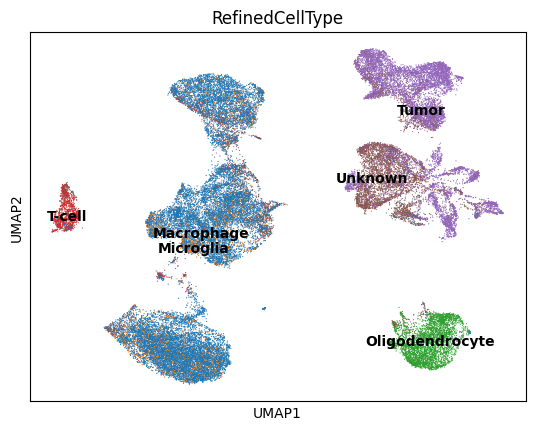

In [ ]:
# Recreate the UMAP plot from the paper and assign labels to clusters based on the RefinedCellType column
# What I've labeled as "unknown" was grouped into "malignant" in the paper
# The paper did not differentiate macrophages and microglia but grouped them together under "macrophages"
adata.obsm['X_umap'] = adata.obs[['UMAP1','UMAP2']].to_numpy()
sc.pl.umap(adata, color='RefinedCellType', legend_loc='on data')